===========iteration:0===========
std=0.01:2.3103760372668836
Xavier:2.296482463052507
He:2.3007629311271556
===========iteration:100===========
std=0.01:2.135483128247964
Xavier:2.2555444749888056
He:1.3965275583382706
===========iteration:200===========
std=0.01:1.8207402505565797
Xavier:2.1669469822425587
He:0.7659450059561641
===========iteration:300===========
std=0.01:1.2777718116218015
Xavier:1.9901141022062947
He:0.5514423245476504
===========iteration:400===========
std=0.01:0.7288395216641372
Xavier:1.3846774280916878
He:0.33508602214513655
===========iteration:500===========
std=0.01:0.7309774008013743
Xavier:1.0232384131439045
He:0.39307735102836827
===========iteration:600===========
std=0.01:0.5890661027203902
Xavier:0.7557511629661049
He:0.3892325506932509
===========iteration:700===========
std=0.01:0.4523120566631786
Xavier:0.5606204817640772
He:0.27777826194732674
===========iteration:800===========
std=0.01:0.43612681356042254
Xavier:0.5151651404185535
He:0.283606511

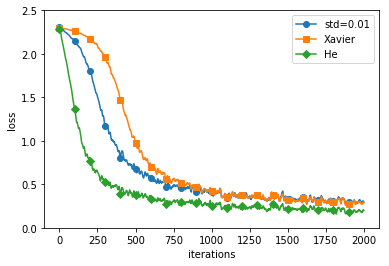

In [6]:
# coding: utf-8
# 變更 STD 觀察結果，但注意 std 數字每個資料都不同，並非絕對值

import os
import sys

sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD



(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128 # 樣本數
max_iterations = 2000 # 最大迭代次數 ( 重複運算次數


weight_init_types = {'std=0.01': 0.1, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()
